In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
def load_images_from_folder(folder, size=(48, 48)):
    images = []
    labels = []
    for label in os.listdir(folder):
        sub_folder = os.path.join(folder, label)
        for filename in os.listdir(sub_folder):
            img = cv2.imread(os.path.join(sub_folder, filename))
            
            if img is not None:
                # Resize ảnh về kích thước chuẩn
                img = cv2.resize(img, size)
                
                images.append(img)
                labels.append(label)
    return images, labels

In [3]:
images, labels = load_images_from_folder("/mnt/c/Users/Admin/Desktop/code python/dự án cuối cs50/dataset")

images = np.array(images) / 255.0  # Chuyển danh sách ảnh sang mảng NumPy và chuẩn hóa giá trị

labels = np.array(labels)


X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)


In [4]:


label_encoder = LabelEncoder()

# Mã hóa nhãn thành số nguyên
Y_train_encoded = label_encoder.fit_transform(Y_train)  # Y_train là danh sách nhãn ban đầu
Y_test_encoded = label_encoder.transform(Y_test)
Y_val_encoded = label_encoder.transform(Y_val)
# Chuyển đổi nhãn dạng số thành one-hot encoding
print("Nhãn huấn luyện đã mã hóa:", Y_train_encoded[:5])  # In 5 nhãn đầu tiên
print("Nhãn kiểm tra đã mã hóa:", Y_test_encoded[:5])

Nhãn huấn luyện đã mã hóa: [2 3 2 1 1]
Nhãn kiểm tra đã mã hóa: [0 0 3 0 1]


In [5]:
num_classes = 5

Y_train = to_categorical(Y_train_encoded, num_classes=num_classes)
Y_test = to_categorical(Y_test_encoded, num_classes=num_classes)
Y_val = to_categorical(Y_val_encoded, num_classes=num_classes)

print("Dạng One-Hot của nhãn huấn luyện:", Y_train[0])

Dạng One-Hot của nhãn huấn luyện: [0. 0. 1. 0. 0.]


In [38]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Ensure the correct number of classes
])

# Compile mô hình

model.compile(optimizer= 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# In tóm tắt mô hình
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 46, 46, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,420,933 (5.42 MB)

 Trainable params: 1,420,933 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Huấn luyện mô hình
datagen = ImageDataGenerator(
    rotation_range=10,        # Xoay ngẫu nhiên ảnh trong khoảng 10 độ
    width_shift_range=0.1,    # Dịch chuyển ngang ngẫu nhiên 10%
    height_shift_range=0.1,   # Dịch chuyển dọc ngẫu nhiên 10%
    shear_range=0.1,          # Biến đổi shear ngẫu nhiên
    zoom_range=0.1,           # Phóng to hoặc thu nhỏ ngẫu nhiên 10%
    horizontal_flip=True,     # Lật ngang ảnh
    fill_mode='nearest'       # Điền các pixel còn thiếu bằng các giá trị gần nhất
)

history = model.fit(datagen.flow(X_train, Y_train), validation_data=(X_val, Y_val), epochs=50)



Epoch 1/50
285/285 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.2853 - loss: 1.5154 - val_accuracy: 0.2912 - val_loss: 1.4260
Epoch 2/50
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.3245 - loss: 1.4300 - val_accuracy: 0.4079 - val_loss: 1.3571
Epoch 3/50
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.3708 - loss: 1.3683 - val_accuracy: 0.4504 - val_loss: 1.2511
Epoch 4/50
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.4422 - loss: 1.2886 - val_accuracy: 0.4671 - val_loss: 1.2188
Epoch 5/50
285/285 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.4996 - loss: 1.1902 - val_accuracy: 0.5947 - val_loss: 0.9752
Epoch 6/50
285/285 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.5474 - loss: 1.0847 - val_accuracy: 0.6018 - val_loss: 0.9776
Epoch 7/50
285/285 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.5690 - loss: 1.0391 - val_accuracy: 0.6219 - val_loss: 0.9171
Epoch 8/50
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.5670 - loss: 1.0247 - val_accu

In [36]:
# Đánh giá mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_accuracy}')



90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7393 - loss: 0.6564
Test accuracy: 0.7273684144020081


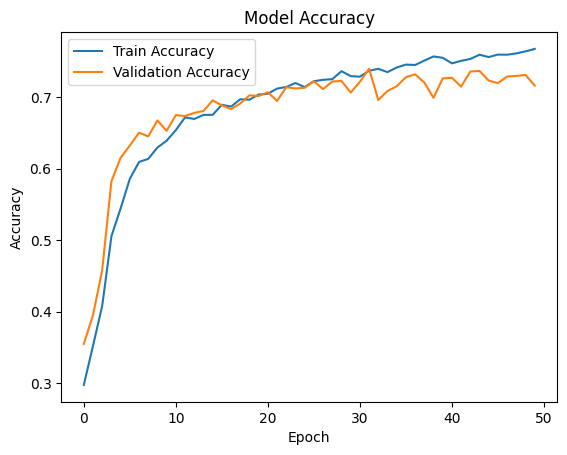

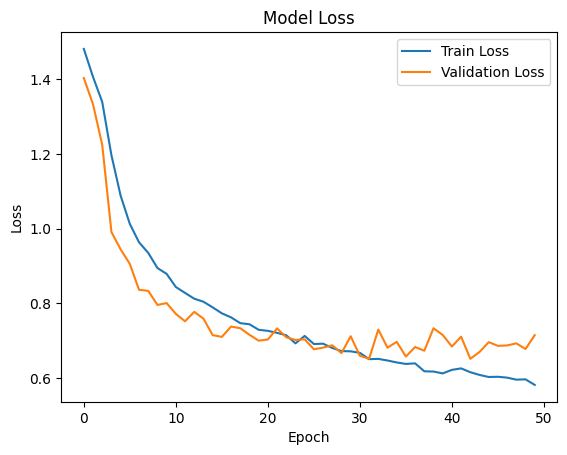

In [37]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Vẽ biểu đồ loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [30]:
model.save('emotion_detection_model.h5')